In [1]:
# KNN Classification
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline 
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('wdbc.data',header=None)
headers=['id','diagnosis','mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness','mean_compactness','mean_concavity','mean_concave points','mean_symmetry','mean_fractal dimension','SE_radius','SE_texture','SE_perimeter','SE_area','SE_smoothness','SE_compactness','SE_concavity','SE_concave points','SE_symmetry','SE_fractal dimension','worst_radius','worst_texture','worst_perimeter','worst_area','worst_smoothness','worst_compactness','worst_concavity','worst_concave points','worst_symmetry','worst_fractal dimension']
data.to_csv('labeledData.csv',header=headers,index=False)
data=pd.read_csv('labeledData.csv')

data.head()

In [3]:
data.head()

,id,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
def diag(z):
    if z== 'M':
        return 1
    else:
        return 0

z=data['diagnosis'].apply(diag)
data.diagnosis=z

In [6]:
df = pd.DataFrame(data=data)
df=df.drop('id',axis=1)

x=df.drop('diagnosis',axis=1)
y=df['diagnosis']


In [7]:
x_scaled=x.apply(zscore)
x_scaled.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,mean_symmetry,mean_fractal dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.373633e-16,6.868164e-17,-1.248757e-16,-2.185325e-16,-8.366672e-16,1.873136e-16,4.995028e-17,-4.995028e-17,1.748260e-16,4.745277e-16,...,-8.241796e-16,1.248757e-17,-3.746271e-16,0.000000,-2.372638e-16,-3.371644e-16,7.492542e-17,2.247763e-16,2.622390e-16,-5.744282e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-0.642136,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-0.341181,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,0.357589,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


In [8]:
num_folds=10
kfold=KFold(n_splits=num_folds)
model=KNeighborsClassifier()
results=cross_val_score(model,x_scaled,y,cv=kfold)
print(results.mean())

0.9666040100250626


In [9]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=42)

In [13]:
knn=KNeighborsClassifier(n_neighbors=5,weights='distance')
knn.fit(x_train,y_train)

KNeighborsClassifier(weights='distance')

In [14]:
predicted_labels=knn.predict(x_test)
knn.score(x_test,y_test)

0.9590643274853801

Confusion Matrix


<Axes: >

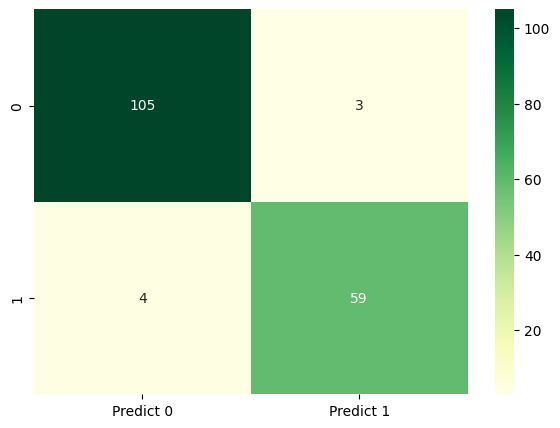

In [15]:
from sklearn import metrics
print('Confusion Matrix')
cm=metrics.confusion_matrix(y_test,predicted_labels,labels=[0,1])
df_cm=pd.DataFrame(cm,index=[i for i in [0,1]],
                   columns=[i for i in ['Predict 0','Predict 1']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='.5g',cmap='YlGn')

In [16]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,ConfusionMatrixDisplay


print(classification_report(y_test,predicted_labels))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [17]:
from sklearn.model_selection import GridSearchCV
#Hyperparameters to be tuned
leaf_size=list(range(1,50))
n_neighbors=list(range(1,30))
p=[1,2]
hyperparameters=dict(leaf_size=leaf_size,n_neighbors=n_neighbors,p=p)
#create a new KNN object
knn_2=KNeighborsClassifier()
clf=GridSearchCV(knn_2,hyperparameters,cv=10)
#fit the model
best_model=clf.fit(x_scaled,y)
print('Best leaf_size:',best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:',best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:',best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 3


In [18]:
y_pred=best_model.predict(x_test)
best_model.score(x_test,y_test)

0.9824561403508771

Confusion Matrix


<Axes: >

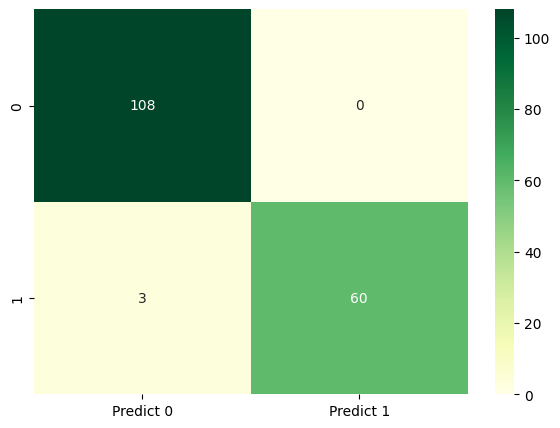

In [19]:
from sklearn import metrics
print('Confusion Matrix')
cm=metrics.confusion_matrix(y_test,y_pred,labels=[0,1])
df_cm=pd.DataFrame(cm,index=[i for i in [0,1]],
                   columns=[i for i in ['Predict 0','Predict 1']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='.5g',cmap='YlGn')

In [20]:
false_negatives=np.logical_and(y_test!=y_pred,y_pred==0)
x_test[false_negatives]

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,mean_symmetry,mean_fractal dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
73,-0.092956,-0.814392,-0.063393,-0.201331,0.308838,0.448373,-0.136966,0.045677,-0.546249,0.405774,...,0.062293,-0.784455,0.090513,-0.119860,0.382749,0.635726,0.027401,0.360776,-0.504352,1.055903
255,-0.047513,-0.521181,-0.022203,-0.149284,0.942210,0.446478,0.114133,0.091333,0.351883,-0.212302,...,0.025018,-0.587414,0.024984,-0.095952,0.825491,0.457607,0.233695,0.347072,0.270565,-0.242489
414,0.284783,2.448156,0.195281,0.183760,-0.936557,-1.104700,-0.526547,-0.555322,0.147430,-1.397419,...,0.205179,1.829188,0.084556,0.089332,-0.770135,-0.989865,-0.563654,-0.743914,0.537498,-1.235541


In [21]:
true_negatives=np.logical_and(y_test==y_pred,y_pred==0)
frames=[x_test[false_negatives],x_test[true_negatives]]
pred_neg=pd.concat(frames)
pred_neg

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,mean_symmetry,mean_fractal dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
73,-0.092956,-0.814392,-0.063393,-0.201331,0.308838,0.448373,-0.136966,0.045677,-0.546249,0.405774,...,0.062293,-0.784455,0.090513,-0.119860,0.382749,0.635726,0.027401,0.360776,-0.504352,1.055903
255,-0.047513,-0.521181,-0.022203,-0.149284,0.942210,0.446478,0.114133,0.091333,0.351883,-0.212302,...,0.025018,-0.587414,0.024984,-0.095952,0.825491,0.457607,0.233695,0.347072,0.270565,-0.242489
414,0.284783,2.448156,0.195281,0.183760,-0.936557,-1.104700,-0.526547,-0.555322,0.147430,-1.397419,...,0.205179,1.829188,0.084556,0.089332,-0.770135,-0.989865,-0.563654,-0.743914,0.537498,-1.235541
204,-0.470694,-0.160486,-0.448110,-0.491999,0.234114,0.027651,-0.109847,-0.276232,0.413949,0.132176,...,-0.269040,-0.168905,-0.333935,-0.356299,0.448503,-0.104741,-0.024412,-0.199563,0.183204,0.196958
431,-0.490575,-0.374576,-0.432457,-0.532101,0.643316,0.516599,-0.142993,-0.539846,-0.002259,1.165609,...,-0.701842,-0.450625,-0.525756,-0.641257,0.553709,0.054930,-0.152986,-0.622863,-0.557739,0.534440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,-1.035883,-1.002884,-1.008296,-0.913779,0.128078,-0.057631,-0.319515,-0.689709,0.413949,0.900517,...,-0.857154,-0.668836,-0.770000,-0.773804,0.014527,0.288394,0.104162,-0.327467,0.192911,0.693484
69,-0.382650,-0.651497,-0.436576,-0.433410,0.138753,-0.985496,-0.656240,-0.523080,-0.809117,-0.888499,...,-0.581734,-0.963583,-0.643112,-0.572523,-0.121364,-1.168303,-0.807368,-0.849434,-0.837615,-1.099772
542,0.174018,1.426574,0.112489,0.038995,-0.968582,-0.610256,-0.599491,-0.481036,0.103619,-0.850224,...,0.049868,1.076850,0.004134,-0.095249,-1.155891,-0.742153,-0.532950,-0.077750,-0.289188,-0.797202
176,-1.199475,-0.286147,-1.127336,-1.002515,0.044814,0.474905,0.526062,-0.303315,-0.520693,2.603060,...,-1.037316,-0.209616,-1.018414,-0.862051,-0.099446,0.259131,0.366586,-0.236107,-0.463908,1.787392


In [22]:
stacks=[y_test[false_negatives],y_test[true_negatives]]
y_labels=np.hstack(stacks)
y_labels.shape
print(y_labels)

[1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [23]:
new_df=pd.DataFrame(data=pred_neg)
new_df['diagnosis']=y_labels
new_df.shape
new_df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,mean_symmetry,mean_fractal dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension,diagnosis
73,-0.092956,-0.814392,-0.063393,-0.201331,0.308838,0.448373,-0.136966,0.045677,-0.546249,0.405774,...,-0.784455,0.090513,-0.119860,0.382749,0.635726,0.027401,0.360776,-0.504352,1.055903,1
255,-0.047513,-0.521181,-0.022203,-0.149284,0.942210,0.446478,0.114133,0.091333,0.351883,-0.212302,...,-0.587414,0.024984,-0.095952,0.825491,0.457607,0.233695,0.347072,0.270565,-0.242489,1
414,0.284783,2.448156,0.195281,0.183760,-0.936557,-1.104700,-0.526547,-0.555322,0.147430,-1.397419,...,1.829188,0.084556,0.089332,-0.770135,-0.989865,-0.563654,-0.743914,0.537498,-1.235541,1
204,-0.470694,-0.160486,-0.448110,-0.491999,0.234114,0.027651,-0.109847,-0.276232,0.413949,0.132176,...,-0.168905,-0.333935,-0.356299,0.448503,-0.104741,-0.024412,-0.199563,0.183204,0.196958,0
431,-0.490575,-0.374576,-0.432457,-0.532101,0.643316,0.516599,-0.142993,-0.539846,-0.002259,1.165609,...,-0.450625,-0.525756,-0.641257,0.553709,0.054930,-0.152986,-0.622863,-0.557739,0.534440,0


In [24]:
new_df['diagnosis'].value_counts()

diagnosis
0    108
1      3
Name: count, dtype: int64

In [25]:
new_df_corr=new_df.corr()['diagnosis'].abs().sort_values(ascending=False)
new_df_corr

diagnosis                  1.000000
worst_area                 0.316577
worst_radius               0.289529
worst_perimeter            0.286102
SE_area                    0.230159
mean_area                  0.229837
mean_perimeter             0.216750
mean_radius                0.211266
worst_concave points       0.169396
mean_concave points        0.169167
SE_radius                  0.131486
worst_compactness          0.130878
mean_concavity             0.115360
mean_compactness           0.113136
SE_perimeter               0.112116
mean_texture               0.108400
worst_concavity            0.087137
worst_smoothness           0.081663
worst_texture              0.081404
mean_fractal dimension     0.080556
SE_smoothness              0.070546
worst_symmetry             0.068493
SE_texture                 0.062043
SE_fractal dimension       0.059387
mean_smoothness            0.051853
SE_concave points          0.031789
worst_fractal dimension    0.030647
mean_symmetry              0

In [26]:
features=new_df_corr[new_df_corr>0.2].index.to_list()[1:]
features

['worst_area',
 'worst_radius',
 'worst_perimeter',
 'SE_area',
 'mean_area',
 'mean_perimeter',
 'mean_radius']

In [27]:
from sklearn.linear_model import LinearRegression
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        x = [f for f in features if f != feature]        
        x, y = df[x], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(x, y).score(x, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})
calculate_vif(new_df,features)

,VIF,Tolerance
worst_area,245.432662,0.004074
worst_radius,225.617968,0.004432
worst_perimeter,74.357191,0.013449
SE_area,1.427665,0.700444
mean_area,368.318175,0.002715
mean_perimeter,398.964991,0.002506
mean_radius,692.776191,0.001443


In [28]:
features=['worst_radius','SE_area','worst_concave points']
calculate_vif(new_df,features)

,VIF,Tolerance
worst_radius,1.544534,0.647445
SE_area,1.094041,0.914042
worst_concave points,1.432551,0.698055


In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x=new_df.loc[:,features]
y=new_df.loc[:,'diagnosis']
random_state=42
x_train,x_test,y_train,y_test=\
train_test_split(x,y,test_size=0.3,shuffle=True,random_state=random_state)
knn_n=KNeighborsClassifier()
knn_n.fit(x_train,y_train)

knn_n.score(x_test,y_test)

0.9705882352941176

In [32]:
y_pred=knn_n.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.00      0.00      0.00         1

    accuracy                           0.97        34
   macro avg       0.49      0.50      0.49        34
weighted avg       0.94      0.97      0.96        34



c:\Users\sheel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sheel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sheel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

<Axes: >

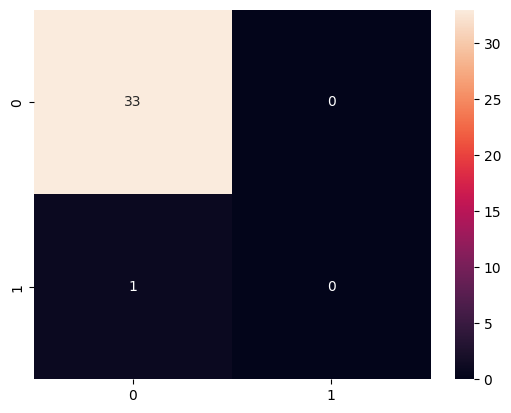

In [34]:
cm=metrics.confusion_matrix(y_test,knn_n.predict(x_test))
sns.heatmap(cm,annot=True,fmt='d')

In [35]:
leaf_size=list(range(1,50))
n_neighbors=list(range(1,30))
p=[1,2]
hyperparameters=dict(leaf_size=leaf_size,n_neighbors=n_neighbors,p=p)
#create a new KNN object
knn_n_tuned=KNeighborsClassifier()
clf=GridSearchCV(knn_n_tuned,hyperparameters,cv=10)
#fit the model
best_model=clf.fit(x,y)
print('Best leaf_size:',best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:',best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:',best_model.best_estimator_.get_params()['n_neighbors'])


c:\Users\sheel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


Best leaf_size: 1
Best p: 1
Best n_neighbors: 4


In [36]:
y_pred=best_model.predict(x_test)
best_model.score(x_test,y_test)

0.9705882352941176

Confusion Matrix


<Axes: >

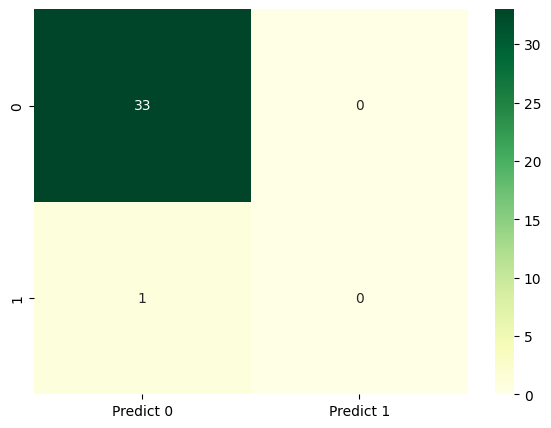

In [37]:
from sklearn import metrics
print('Confusion Matrix')
cm=metrics.confusion_matrix(y_test,y_pred,labels=[0,1])
df_cm=pd.DataFrame(cm,index=[i for i in [0,1]],
                   columns=[i for i in ['Predict 0','Predict 1']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='.5g',cmap='YlGn')

In [38]:
x=new_df.drop('diagnosis',axis=1)
y=new_df['diagnosis']

In [51]:
from sklearn.decomposition import PCA
components=None
pca_n=PCA(n_components=components)
pca_n.fit(x)
print('Cumulative Variances Percentage:')
print(pca.explained_variance_ratio_.cumsum()*100)

Cumulative Variances Percentage:
[31.33946457 50.48852305 65.90396901 73.46764938 80.57795264 85.77634153]


Text(0, 0.5, 'Explained variance(%)')

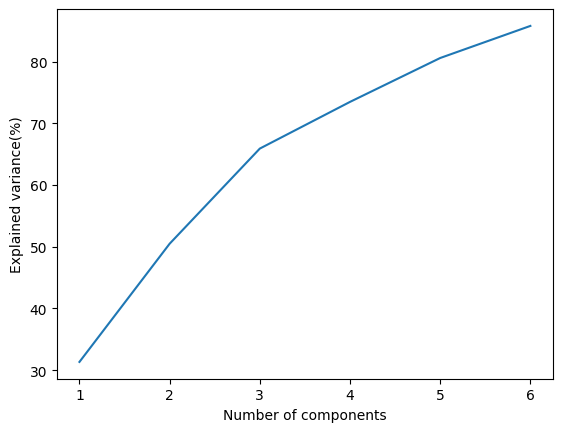

In [52]:
components=len(pca.explained_variance_ratio_)\
    if components is None else components
plt.plot(range(1,components+1),
         np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance(%)')

Cumulative Variances (Percentage):
[31.33946457 50.48852305 65.90396901 73.46764938 80.57795264 85.77634153]
Number of components:6


Text(0, 0.5, 'Explained Variance (%)')

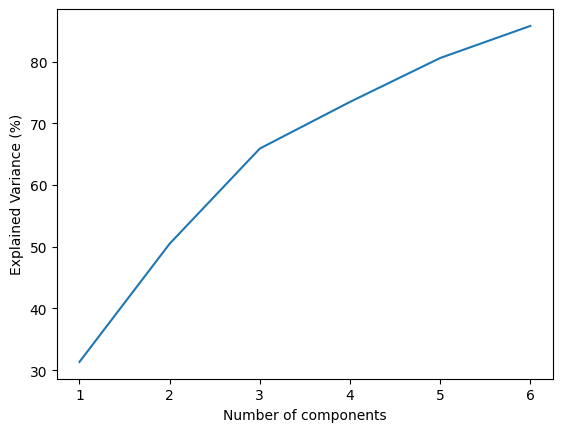

In [62]:
from sklearn.decomposition import PCA
pca_n=PCA(n_components=0.85)
pca_n.fit(x)
print('Cumulative Variances (Percentage):')
print(np.cumsum(pca_n.explained_variance_ratio_*100))
components=len(pca_n.explained_variance_ratio_)
print(f'Number of components:{components}')
plt.plot(range(1,components+1),
np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance (%)')

In [63]:
pca_n_components=abs(pca_n.components_)
print(pca_n_components)

[[0.0398405  0.09848313 0.02644045 0.03037346 0.24246847 0.19533846
  0.17528555 0.10540765 0.16771765 0.28742308 0.08342074 0.01948502
  0.07245904 0.03149686 0.18141487 0.33345417 0.36873073 0.30967724
  0.20428427 0.360185   0.02711115 0.10088855 0.01778323 0.02117902
  0.16145573 0.15390203 0.20569824 0.12655342 0.10963287 0.21160416]
 [0.18700926 0.22039956 0.1842136  0.13469716 0.01041502 0.09965415
  0.09907305 0.10504584 0.13107073 0.11301301 0.10972896 0.5423484
  0.08349876 0.02407898 0.32885035 0.02757957 0.09028853 0.07576705
  0.36647176 0.09367006 0.15775297 0.17777402 0.16160044 0.10584086
  0.04324737 0.18280391 0.2028868  0.2225959  0.00422999 0.06405447]
 [0.09611995 0.37693681 0.09449309 0.07482681 0.39555849 0.01340619
  0.11607581 0.01434893 0.29417044 0.11728469 0.01679698 0.24999813
  0.02058442 0.0254976  0.1705051  0.22940584 0.27362205 0.14082978
  0.05207832 0.18735391 0.07237197 0.3262301  0.07477771 0.05367087
  0.31253305 0.07681412 0.16254331 0.05418525 0

In [61]:
print('Top 4 most important features in each component')

for row in range(pca_n_components.shape[0]):
    # get the indices of the top 6 values in each row
    temp = np.argpartition(-(pca_n_components[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_n_components[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {df.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['SE_compactness', 'SE_symmetry', 'SE_smoothness', 'SE_concavity']
Component 1: ['SE_radius', 'SE_concave points', 'SE_area', 'worst_concavity']
Component 2: ['mean_area', 'mean_radius', 'worst_radius', 'worst_area']
Component 3: ['worst_radius', 'mean_radius', 'worst_concave points', 'worst_area']
Component 4: ['mean_area', 'SE_radius', 'worst_concave points', 'worst_area']
Component 5: ['mean_concave points', 'worst_concave points', 'SE_concave points', 'SE_area']
Component 6: ['SE_symmetry', 'SE_compactness', 'SE_radius', 'worst_compactness']
Component 7: ['SE_area', 'SE_radius', 'mean_symmetry', 'worst_symmetry']
Component 8: ['SE_concave points', 'mean_concave points', 'worst_concave points', 'SE_concavity']
Component 9: ['worst_smoothness', 'SE_area', 'mean_area', 'SE_symmetry']
Component 10: ['SE_concavity', 'SE_compactness', 'worst_concavity', 'worst_compactness']
Component 11: ['mean_symmetry', 'SE_symmetry', 'mean_r

In [57]:
x_pca=pca_n.transform(x)
print(x_pca.shape)
print(x_pca)

(111, 30)
[[ 6.79380272e-01 -2.88709733e+00 -3.16523777e-01 ...  9.74658652e-03
   8.31140331e-03  4.72966517e-03]
 [ 1.51906853e+00 -2.01913988e+00 -5.78533787e-01 ...  1.40534527e-02
  -1.35532210e-02 -6.67246554e-03]
 [-1.62602449e+00  1.24562031e+00  2.32585701e+00 ... -4.08279847e-02
   1.31674730e-02 -2.11124271e-03]
 ...
 [-1.48297414e+00 -3.37561350e-01  2.05073105e+00 ...  3.82997583e-03
   1.63449347e-02  4.72993902e-03]
 [ 7.99784675e+00  2.32656386e+00  2.97803726e+00 ... -3.91425505e-02
  -1.14608359e-02 -5.94579376e-03]
 [ 3.73740870e+00 -3.98696567e+00  1.82608136e+00 ...  2.21850777e-02
   7.81065801e-03 -2.41805750e-04]]


In [58]:
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.3,random_state=42)

In [59]:
knn_pca=KNeighborsClassifier(n_neighbors=5,weights='distance')
knn_pca.fit(x_train,y_train)
y_pred=knn_pca.predict(x_test)
knn.score(x_test,y_test)

c:\Users\sheel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 30 features, but KNeighborsClassifier is expecting 3 features as input.

In [172]:
from sklearn import metrics
print('Confusion Matrix')
cm=metrics.confusion_matrix(y_test,predicted_labels,labels=[0,1])
df_cm=pd.DataFrame(cm,index=[i for i in [0,1]],
                   columns=[i for i in ['Predict 0','Predict 1']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='.5g',cmap='YlGn')

Confusion Matrix


ValueError: Found input variables with inconsistent numbers of samples: [34, 171]

In [ ]:
leaf_size=list(range(1,50))
n_neighbors=list(range(1,30))
p=[1,2]
hyperparameters=dict(leaf_size=leaf_size,n_neighbors=n_neighbors,p=p)
#create a new KNN object
knn_pca_tuned=KNeighborsClassifier()
clf=GridSearchCV(knn_pca_tuned,hyperparameters,cv=10)
#fit the model
best_model=clf.fit(x_pca,y)
print('Best leaf_size:',best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:',best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:',best_model.best_estimator_.get_params()['n_neighbors'])